# Notebook Setup

## Jupyter Display Setup

In [48]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))

In [49]:
%matplotlib inline

## Essential Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Pandas display setup

In [82]:
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 80)        # number of characters per row

# Linear Regression

## The Library

In [52]:
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import statsmodels.formula.api as smf

## The Math

## Sample Data

### Data Emulation

In [53]:
n = 200  # number of samples
I = 250  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I

**Put All Data In pandas DataFrame**

In [54]:
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.head()

    X1   X2   X3      Y
0  191   32   76  303.3
1  157  121   28  313.3
2  106   73  193  340.1
3  191   81  198  354.7
4   73  193  114  347.1

## Data Preprocessing

The aim is to produce:  
  
X : Test dataframe with feature column(s)  
Y : Test dataframe column of actual value

### Preparing Features and Predicted Value

In [55]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

### Splitting Data Into Training and Test Sets

In [56]:
trainX,testX,trainY,testY = sklearn.model_selection.train_test_split(X,Y,test_size=0.2)

### Data Validation

Ensure there is **no col-linearity** among the features used

#### Colleration Check

In [57]:
X.corr()

          X1        X2        X3
X1  1.000000 -0.010066 -0.063545
X2 -0.010066  1.000000  0.065955
X3 -0.063545  0.065955  1.000000

#### Matrix Scatter Plot

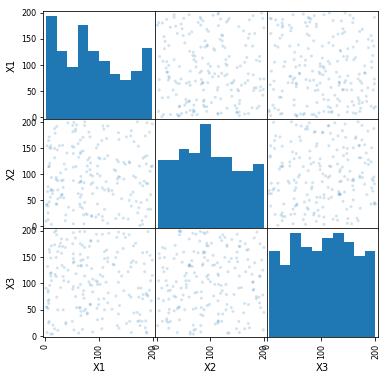

In [58]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='hist');

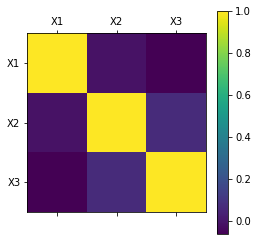

In [59]:
plt.matshow(X.corr())
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

## Modelling (scikit-learn)

### Create The Model

In [60]:
lm = sklearn.linear_model.LinearRegression()   # create linear regression object
lm.fit( trainX, trainY )  # train the model using training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Modelling (statsmodel)

### Create The Model
#### Model From Single DataFrame

In [87]:
fit = smf.ols('Y ~ X1 + X2 + X3', data=mydf).fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):          1.26e-120
Time:                        00:48:29   Log-Likelihood:                -621.88
No. Observations:                 200   AIC:                             1252.
Df Residuals:                     196   BIC:                             1265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    259.2284      1.203    215.454      0.0

#### Model From Multiple Numpy Array

In [88]:
fit2 = smf.OLS(trainY, trainX).fit()
print (fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     716.8
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           2.28e-91
Time:                        00:51:20   Log-Likelihood:                -934.51
No. Observations:                 160   AIC:                             1875.
Df Residuals:                     157   BIC:                             1884.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.8739      0.093      9.381      0.0

In [85]:
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):          1.26e-120
Time:                        00:46:04   Log-Likelihood:                -621.88
No. Observations:                 200   AIC:                             1252.
Df Residuals:                     196   BIC:                             1265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    259.2284      1.203    215.454      0.0

### Model Analysis

**Intercept Value**

In [63]:
lm.intercept_

259.09725449004128

**Co-Efficients**

In [64]:
lm.coef_

array([ 0.09831384,  0.20026362,  0.31126704])

In [65]:
zip(feature_cols, lm.coef_)

In [66]:
lm.score( trainX, trainY )

0.94209468255839912

### Test Data Prediction

In [67]:
predY = lm.predict( testX )

### Model Performance Against Test Data

#### Mean Absolute Error (MAE)

In [68]:
sklearn.metrics.mean_absolute_error( testY, predY )

4.9934064114958421

#### Mean Squared Error (MSE)

In [69]:
sklearn.metrics.mean_squared_error( testY, predY )

31.854635359684721

#### Root Mean Squared Error (RMSE)

In [70]:
math.sqrt( sklearn.metrics.mean_squared_error( testY, predY ) )

5.643991084302377

#### R-Squared

In [71]:
sklearn.metrics.r2_score( testY, predY )

0.93716905561833075

## Prediction

### Performance

In [72]:
lm.predict( testX )

array([ 313.56828619,  319.40728056,  354.68584739,  358.82990964,
        340.85232147,  315.65813223,  349.02149446,  323.06562282,
        280.62818227,  332.02988674,  352.61232303,  335.4312854 ,
        309.7787327 ,  289.32324122,  320.72056368,  326.40543278,
        318.95596993,  284.92295512,  318.90925897,  289.72930216,
        343.78458994,  351.86060581,  335.16863204,  335.33094679,
        310.51718388,  332.93207152,  304.42627562,  355.72742406,
        300.78071552,  346.30891982,  311.3091357 ,  299.65178024,
        299.47658412,  317.03036479,  346.91998971,  282.84687857,
        324.26070642,  358.94647734,  324.65220181,  317.00950751])

## Feature Selection

The advantage of using skcikit-learn package is that it has this particular method selection, works more or less like backward selection (not exactly), and is called **Recursive Feature**. How it works:

- Model run with all variables, weight is assigned to each variable
- Variable with smallest weight will be pruned from next iteration
- Run the model again till the number of desired features is left

### The Library

In [73]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [74]:
estimator = SVR(kernel='linear')       # we are using linear model
selector = RFE (estimator, 2, step=1)  # we want just 2 features
selector = selector.fit(X,Y)           # execute

In [75]:
selector.support_

array([False,  True,  True], dtype=bool)

In [76]:
selector.ranking_

array([2, 1, 1])

In [77]:
selector.estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)